LQR gain K:
[[-100.         -193.84036218 1356.09057892  620.46446487]]


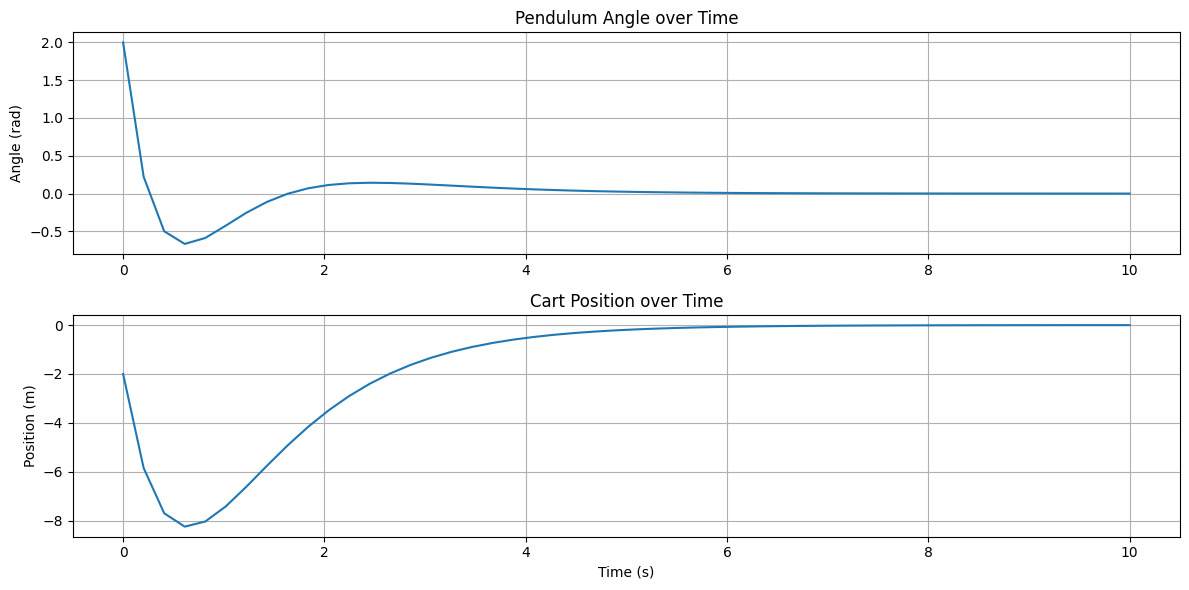

In [13]:
import matplotlib.pyplot as plt
import control
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp


# Constants
M = 0.5     # Mass of the cart in kilograms
m = 0.2     # Mass of the pendulum in kilograms
b = 0.1     # Coefficient of friction for the cart
I = 0.006   # Mass moment of inertia of the pendulum about its pivot
g = 9.8     # Acceleration due to gravity in m/s^2
l = 2    # Length to pendulum center of mass in meters

# Denominator for the A and B matrices
p = I * (M + m) + M * m * l**2

# State-space matrices
A = np.array([
    [0, 1, 0, 0],
    [0, -(I + m * l**2) * b / p, (m**2 * g * l**2) / p, 0],
    [0, 0, 0, 1],
    [0, -(m * l * b) / p, m * g * l * (M + m) / p, 0]
])

B = np.array([
    [0],
    [(I + m * l**2) / p],
    [0],
    [m * l / p]
])

C = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

D = np.array([
    [0],
    [0]
])

# Create the state-space system
sys_ss = control.ss(A, B, C, D)

# LQR Controller Design
Q = np.diag([1, 1, 1, 1])  # Weighting matrix for the states
R = np.array([[0.0001]])      # Weighting matrix for the input

# Compute the LQR gain
K, S, E = control.lqr(sys_ss, Q, R)

# Display the LQR gain
print("LQR gain K:")
print(K)





# Initial conditions
x0 = [-2, 0, 2, 0]  # Slightly perturbed pendulum

# Time span for the simulation
t_span = (0, 10)  # 5 seconds
frames_per_sec = 60  # Frames per second
ms_per_frame = 1 / frames_per_sec * 1000  # Milliseconds per frame
num_frames = int((t_span[1] - t_span[0]) * frames_per_sec)  # Total number of frames
t_eval = np.linspace(t_span[0], t_span[1], )  # Time points for evaluation


# Define the system dynamics
def dynamics(t, x):
    u = -np.dot(K, x)  # Control law
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

# Solve the differential equation
sol = solve_ivp(dynamics, t_span, x0, t_eval=t_eval)


plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(sol.t, sol.y[2], label='Pendulum Angle')
plt.title('Pendulum Angle over Time')
plt.ylabel('Angle (rad)')
plt.grid(True)

plt.subplot(212)
plt.plot(sol.t, sol.y[0], label='Cart Position')
plt.title('Cart Position over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)

plt.tight_layout()
plt.show()



In [14]:
from IPython.display import HTML


# Visualization
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(0, 5)


# Initial drawing elements
left_wheel = ax.scatter([-0.5], [0.25], s=1000, c="k")
right_wheel = ax.scatter([0.5], [0.25], s=1000, c="k")
ax.plot([-10, 10], [0, 0], "k-")  # Ground
cart_body, = ax.plot([-0.8, 0.8], [0.65, 0.65], "b-", linewidth=30)
pendulum_arm, = ax.plot([0, 0], [0.7, 0.7 + l], "k-", lw=2)
pendulum_bob, = ax.plot([0], [0.7 + l], 'ro', ms=15)

def update(frame):
    x = sol.y[0][frame]
    theta = sol.y[2][frame]
    left_wheel.set_offsets([-.5 + x, .25])
    right_wheel.set_offsets([.5 + x, .25])
    cart_body.set_data([-.8 + x, .8 + x], [.65, 0.65])
    pendulum_arm.set_data([x, x + l * np.sin(theta) ], [0.7, 0.7 + l * np.cos(theta)])
    pendulum_bob.set_data([x + l * np.sin(theta)], [0.7 + l * np.cos(theta)])


    return left_wheel, right_wheel, cart_body , pendulum_arm, pendulum_bob

ani = FuncAnimation(fig, update, frames=len(t_eval), blit=True, interval=ms_per_frame*5, repeat=False)
plt.close(fig)
HTML(ani.to_jshtml())



In [15]:

# LQR Controller Design
Q = np.diag([1, 1, 1, 1])  # Weighting matrix for the states
R = np.array([[0.0001]])      # Weighting matrix for the input
x0 = [-2, 0, 0.1, 0]  # Slightly perturbed pendulum

def cart_pendulum(Q=Q, R=R, x0=x0):

    # Compute the LQR gain
    K, S, E = control.lqr(sys_ss, Q, R)

    # Define the system dynamics
    def dynamics(t, x):
        u = -np.dot(K, x)  # Control law
        dxdt = np.dot(A, x) + np.dot(B, u)
        return dxdt

    # Solve the differential equation
    sol = solve_ivp(dynamics, t_span, x0, t_eval=t_eval)


    # Visualization
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 5)


    # Initial drawing elements
    left_wheel = ax.scatter([-0.5], [0.25], s=1000, c="k")
    right_wheel = ax.scatter([0.5], [0.25], s=1000, c="k")
    ax.plot([-10, 10], [0, 0], "k-")  # Ground
    cart_body, = ax.plot([-0.8, 0.8], [0.65, 0.65], "b-", linewidth=30)
    pendulum_arm, = ax.plot([0, 0], [0.7, 0.7 + l], "k-", lw=2)
    pendulum_bob, = ax.plot([0], [0.7 + l], 'ro', ms=15)

    def update(frame):
        x = sol.y[0][frame]
        theta = sol.y[2][frame]
        left_wheel.set_offsets([-.5 + x, .25])
        right_wheel.set_offsets([.5 + x, .25])
        cart_body.set_data([-.8 + x, .8 + x], [.65, 0.65])
        pendulum_arm.set_data([x, x + l * np.sin(theta) ], [0.7, 0.7 + l * np.cos(theta)])
        pendulum_bob.set_data([x + l * np.sin(theta)], [0.7 + l * np.cos(theta)])


        return left_wheel, right_wheel, cart_body , pendulum_arm, pendulum_bob

    ani = FuncAnimation(fig, update, frames=len(t_eval), blit=True, interval=ms_per_frame*5, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())

In [16]:
cart_pendulum(x0=[-5, 0, 1, 0])